# 삼성전자 주가 확인

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [2]:
url = "http://comp.fnguide.com/SVO2/ASP/SVD_main.asp?pGB=1&gicode=A005930&cID=&MenuYn=Y&ReportGB=&NewMenuID=11&stkGb=&strResearchYN="
html = urlopen(url)
bs_obj = BeautifulSoup(html, "html.parser")

In [3]:
bs_obj


<!DOCTYPE html>

<html lang="ko">
<head>
<link href="../css/compeach.css?ver3" rel="stylesheet"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<!-- <meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"> -->
<script src="../js/lib/jquery-1.11.1.min.js" type="text/javascript"></script>
<script src="../js/comp_load.js?ver=1.1" type="text/javascript"></script>
<script src="../js/lib/jquery.autocomplete.js" type="text/javascript"></script>
<link href="../css/jquery.autocomplete.css" rel="stylesheet" type="text/css">
<link href="/SVO2/img/CompanyGuide.ico" rel="SHORTCUT ICON"/>
<script src="../js/autocomplete.js" type="text/javascript"></script>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-74989022-16"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gt

### 날짜

In [4]:
date1 = bs_obj.find("span", {"class":"date"})
print(date1.text)

[2021/03/29]


In [5]:
date2 = date1.text
date = date2.replace('[','').replace(']','').replace('/','-')
print(date)

2021-03-29


### 기업 정보

In [6]:
corp_name1 = bs_obj.find_all("h1", {"id":"giName"})
print(corp_name1)

[<h1 id="giName">삼성전자</h1>]


In [7]:
corp_name = corp_name1[0].text
print(corp_name)

삼성전자


###  종목 코드

In [8]:
code1 = bs_obj.find_all("div", {"class":"corp_group1"})
code2 = code1[0].find("h2")
code = code2.text
print(code)

005930


### 주가

In [9]:
stock_price1 = bs_obj.find("span", {"id":"svdMainChartTxt11"})
print(stock_price1)

<span id="svdMainChartTxt11">81,600</span>


In [10]:
stock_price2 = stock_price1.text
stock_price = int(stock_price2.replace(',', '').strip())
print(stock_price)

81600


### 외국인 보유비중

In [11]:
fgn_own_ratio1 = bs_obj.find("span", {"id":"svdMainChartTxt12"})
print(fgn_own_ratio1)

<span id="svdMainChartTxt12">54.56</span>


In [12]:
fgn_own_ratio = float(fgn_own_ratio1.text)
print(fgn_own_ratio)

54.56


### 상대수익률

In [13]:
rel_return1 = bs_obj.find("span", {"id":"svdMainChartTxt13"})
print(rel_return1)

<span id="svdMainChartTxt13">68.94</span>


In [14]:
rel_return = float(rel_return1.text)
print(rel_return)

68.94


# 상단리스트

In [15]:
up_list = bs_obj.find("div", {"class":"corp_group2"})
print(up_list)

<div class="corp_group2" id="corp_group2">
<dl>
<dt>
<dl style="display:none;"><dt>PER(Price Earning Ratio)</dt><dd>전일자 보통주 수정주가 / 최근 결산 EPS(주당순이익) <br/>* EPS = 당기순이익 / 수정평균발행주식수<br/>* 최근결산은 2020/12 (연간) 기준임.</dd></dl>
<a class="tip_in" href="javascript:void(0)" id="h_per">PER</a>
</dt>
<dd>21.24</dd>
</dl>
<dl>
<dt>
<dl style="display:none;"><dt>12M PER</dt><dd>전일자 보통주 수정주가 / 12개월 Forward EPS</dd></dl>
<a class="tip_in" href="javascript:void(0)" id="h_12m">12M PER</a>
</dt>
<dd>14.95</dd>
</dl>
<dl>
<dt>
<dl style="display:none;"><dt>업종 PER</dt><dd>시장대표업종||SUM(구성종목 시가총액)/SUM(구성종목 당기순이익)<br/>* 전일자 보통주 시가총액 기준<br/>* 당기순이익은  최근결산 2020/12 (연간) 기준임.</dd></dl>
<a class="tip_in" href="javascript:void(0)" id="h_u_per"><span class="ko">업종</span> PER</a>
</dt>
<dd>32.53</dd>
</dl>
<dl>
<dt>
<dl style="display:none;"><dt>PBR(Price Book-value Ratio)</dt><dd>전일자 보통주 수정주가 / 최근 결산기 BPS(주당순자산) <br/>* BPS=(지배주주지분-자기주식) / 무상조정기말주식수(우선주 및 자사주 포함) <br/>* 최근결산은 2020/12 (연간) 기준임.</dd></dl>
<a class="tip_in

In [16]:
dd = up_list.find_all("dd")
print(dd)

[<dd>전일자 보통주 수정주가 / 최근 결산 EPS(주당순이익) <br/>* EPS = 당기순이익 / 수정평균발행주식수<br/>* 최근결산은 2020/12 (연간) 기준임.</dd>, <dd>21.24</dd>, <dd>전일자 보통주 수정주가 / 12개월 Forward EPS</dd>, <dd>14.95</dd>, <dd>시장대표업종||SUM(구성종목 시가총액)/SUM(구성종목 당기순이익)<br/>* 전일자 보통주 시가총액 기준<br/>* 당기순이익은  최근결산 2020/12 (연간) 기준임.</dd>, <dd>32.53</dd>, <dd>전일자 보통주 수정주가 / 최근 결산기 BPS(주당순자산) <br/>* BPS=(지배주주지분-자기주식) / 무상조정기말주식수(우선주 및 자사주 포함) <br/>* 최근결산은 2020/12 (연간) 기준임.</dd>, <dd>2.07</dd>, <dd>{최근 결산기 보통주 DPS(현금, 무상조정) / 전일자 보통주 수정주가} *100<br/>* 최근결산은 2020/12 (연간) 기준임.</dd>, <dd>3.67%</dd>]


# PER

In [17]:
per = float(dd[1].text)
print(per)

21.24


# 12M PER

In [18]:
per_12m = float(dd[3].text)
print(per_12m)

14.95


# 업종 PER

In [19]:
per_ind = float(dd[5].text)
print(per_ind)

32.53


# PBR

In [20]:
pbr = float(dd[7].text)
print(pbr)

2.07


# 배당 수익률

In [21]:
div_yid1 = dd[9].text
print(div_yid1)

3.67%


In [22]:
div_yid2 = div_yid1.replace('%','')
print(div_yid2)

3.67


In [23]:
div_yid = float(div_yid2)
print(div_yid)

3.67


### 테이블

In [27]:
table1 = bs_obj.find("div", {"id":"div1"})
table2 = table1.find_all("td")
print(table2)

[<td class="r">81,600/ <span class="tcr">+100</span></td>, <td class="cle r"> 14,952,134</td>, <td class="r">91,000/ 45,800</td>, <td class="cle r"> 12,166</td>, <td class="r"><span class="tcb">-1.09</span>/ <span class="tcr">+4.21</span>/ <span class="tcr">+40.21</span>/ <span class="tcr">+68.94</span>
<input id="c3M" type="hidden" value="4.21"/><input id="c1Y" type="hidden" value="68.94"/><input id="c3Y" type="hidden" value="66.39"/></td>, <td class="cle r">54.56</td>, <td class="r">5,481,102</td>, <td class="cle r">1.08700</td>, <td class="r">4,871,343</td>, <td class="cle r">100</td>, <td class="r">5,969,782,550/ 822,886,700</td>, <td class="cle r">4,706,476,576 / 78.84</td>]


### 거래량

In [28]:
volume1 = table2[1].text

In [29]:
volume = int(volume1.replace(',', '').strip())

In [30]:
print(volume)

14952134


### 거래 대금

In [31]:
trans_price1 = table2[3].text

In [32]:
trans_price = int(trans_price1.replace(',', '').strip())

In [33]:
print(trans_price)

12166


### 시가총액(우선주 포함)

In [34]:
mk_cpt_pfr1 = table2[6].text

In [35]:
mk_cpt_pfr = int(mk_cpt_pfr1.replace(',', '').strip())

In [36]:
print(mk_cpt_pfr)

5481102


### 시가총액(보통주)

In [37]:
mk_cpt_cm1 = table2[8].text

In [38]:
mk_cpt_cm = int(mk_cpt_cm1.replace(',', '').strip())

In [39]:
print(mk_cpt_cm)

4871343


## 결과 모음 리스트

In [40]:
# [날짜, 기업정보, 종목코드, 주가, 외국인 보유비중, 상대수익률,
#  per, 12m per, 업종per, pbr, 배당수익률
#  테이블, 거래량, 거래 대금, 시가총액(우선주포함), 시가총액(보통주)] 

In [41]:
res = [date, corp_name, code, stock_price, fgn_own_ratio, rel_return,per, per_12m, per_ind, pbr, div_yid, volume, trans_price, mk_cpt_pfr, mk_cpt_cm]

In [42]:
print(res)

['2021-03-29', '삼성전자', '005930', 81600, 54.56, 68.94, 21.24, 14.95, 32.53, 2.07, 3.67, 14952134, 12166, 5481102, 4871343]


# MySQL 데이터 삽입

In [43]:
import pymysql

In [44]:
conn = pymysql.connect(host='localhost', user='root', 
                       password='1234', db='stock', charset='utf8')

In [45]:
sql_state = """INSERT INTO stock.daily_market(dt, item_name, item_code, price, foreign_ownership_ratio, rel_return, per, per_12m, per_ind, pbr, dividend_yield, volume, trans_price, market_capital_prefer, market_capital_common) VALUES ('%s', '%s', '%s', %d, %f, %f, %f, %f, %f, %f, %f, %d, %d, %d, %d)"""%(tuple(res))

In [46]:
print(sql_state)

INSERT INTO stock.daily_market(dt, item_name, item_code, price, foreign_ownership_ratio, rel_return, per, per_12m, per_ind, pbr, dividend_yield, volume, trans_price, market_capital_prefer, market_capital_common) VALUES ('2021-03-29', '삼성전자', '005930', 81600, 54.560000, 68.940000, 21.240000, 14.950000, 32.530000, 2.070000, 3.670000, 14952134, 12166, 5481102, 4871343)


In [44]:
db =  conn.cursor()
db.execute(sql_state)
conn.commit()
conn.close()

# 슬랙 메시지 보내기 예제

In [1]:
import requests

token = "발급받은 키를 입력하세요"
channel = "#stock_alarm01"
text = "Check your stock crawler."

requests.post("https://slack.com/api/chat.postMessage",
    headers={"Authorization": "Bearer "+token},
    data={"channel": channel,"text": text})


<Response [200]>

# MySQL 데이터 추출

In [4]:
import pymysql

In [5]:
conn = pymysql.connect(host='localhost', user='root', 
                       password='1234', db='stock', charset='utf8')

In [6]:
sql_state = """SELECT * FROM stock.daily_market WHERE dt BETWEEN '2021-03-22' AND '2021-03-30';"""

In [7]:
db =  conn.cursor()
db.execute(sql_state)
rows = db.fetchall()
conn.close()

In [8]:
print(rows)

((2, datetime.date(2021, 3, 22), '삼성전자', '005930', 82000, 54.73, 80.62, 21.35, 15.08, 32.95, 2.08, 3.65, 12670506, 10395, 5498398, 4895222), (3, datetime.date(2021, 3, 22), 'LG전자', '066570', 155000, 31.09, 243.68, 14.24, 11.32, 32.95, 1.81, 0.77, 962272, 1490, 266097, 253654), (4, datetime.date(2021, 3, 23), '삼성전자', '005930', 81800, 54.71, 92.47, 21.3, 15.01, 32.61, 2.08, 3.66, 13299907, 10929, 5486458, 4883282), (5, datetime.date(2021, 3, 23), 'LG전자', '066570', 145500, 30.91, 247.67, 13.37, 10.62, 32.61, 1.7, 0.82, 2053555, 3066, 250189, 238108), (6, datetime.date(2021, 3, 24), '삼성전자', '005930', 81000, 54.68, 72.52, 21.09, 14.93, 32.39, 2.06, 3.7, 17926638, 14542, 5435408, 4835524), (7, datetime.date(2021, 3, 24), 'LG전자', '066570', 146500, 30.98, 229.95, 13.46, 10.7, 32.39, 1.71, 0.82, 1127948, 1641, 251688, 239744), (11, datetime.date(2021, 3, 25), '삼성전자', '005930', 81200, 54.67, 66.91, 21.14, 14.86, 32.44, 2.06, 3.69, 14758826, 12007, 5451462, 4847463), (12, datetime.date(2021, 3, 2

# 추출 결과 데이터프레임으로 변환

In [9]:
import pandas as pd

In [10]:
colnames = ['seq', 'dt','item_name', 'item_code', 'price',
            'foreign_ownership_ratio', 'rel_return', 'per', 
            'per_12m', 'per_ind', 'pbr','dividend_yield', 'volume', 
            'trans_price','market_capital_prefer','maket_capital_common']
df = pd.DataFrame(rows, columns=colnames)

In [51]:
df.head(5)

,seq,dt,item_name,item_code,price,foreign_ownership_ratio,rel_return,per,per_12m,per_ind,pbr,dividend_yield,volume,trans_price,market_capital_prefer,maket_capital_common
0,2,2021-03-22,삼성전자,005930,82000,54.73,80.62,21.35,15.08,32.95,2.08,3.65,12670506,10395,5498398,4895222
1,3,2021-03-22,LG전자,066570,155000,31.09,243.68,14.24,11.32,32.95,1.81,0.77,962272,1490,266097,253654
2,4,2021-03-23,삼성전자,005930,81800,54.71,92.47,21.30,15.01,32.61,2.08,3.66,13299907,10929,5486458,4883282
3,5,2021-03-23,LG전자,066570,145500,30.91,247.67,13.37,10.62,32.61,1.70,0.82,2053555,3066,250189,238108
4,6,2021-03-24,삼성전자,005930,81000,54.68,72.52,21.09,14.93,32.39,2.06,3.70,17926638,14542,5435408,4835524


In [12]:
df_sam = df[df['item_name']=='삼성전자']
df_lg = df[df['item_name']=='LG전자']

In [13]:
df_sam

,seq,dt,item_name,item_code,price,foreign_ownership_ratio,rel_return,per,per_12m,per_ind,pbr,dividend_yield,volume,trans_price,market_capital_prefer,maket_capital_common
0,2,2021-03-22,삼성전자,005930,82000,54.73,80.62,21.35,15.08,32.95,2.08,3.65,12670506,10395,5498398,4895222
2,4,2021-03-23,삼성전자,005930,81800,54.71,92.47,21.30,15.01,32.61,2.08,3.66,13299907,10929,5486458,4883282
4,6,2021-03-24,삼성전자,005930,81000,54.68,72.52,21.09,14.93,32.39,2.06,3.70,17926638,14542,5435408,4835524
6,11,2021-03-25,삼성전자,005930,81200,54.67,66.91,21.14,14.86,32.44,2.06,3.69,14758826,12007,5451462,4847463
8,21,2021-03-26,삼성전자,005930,81500,54.58,70.50,21.22,14.93,32.61,2.07,3.67,12845778,10443,5472663,4865373
10,23,2021-03-29,삼성전자,005930,81600,54.56,68.94,21.24,14.95,32.53,2.07,3.67,14952134,12166,5481102,4871343
12,25,2021-03-29,삼성전자,005930,81600,54.56,68.94,21.24,14.95,32.53,2.07,3.67,14952134,12166,5481102,4871343
14,27,2021-03-30,삼성전자,005930,82200,54.57,71.79,21.40,14.95,32.96,2.09,3.64,13121698,10750,5516097,4907161


In [14]:
df_lg

,seq,dt,item_name,item_code,price,foreign_ownership_ratio,rel_return,per,per_12m,per_ind,pbr,dividend_yield,volume,trans_price,market_capital_prefer,maket_capital_common
1,3,2021-03-22,LG전자,066570,155000,31.09,243.68,14.24,11.32,32.95,1.81,0.77,962272,1490,266097,253654
3,5,2021-03-23,LG전자,066570,145500,30.91,247.67,13.37,10.62,32.61,1.70,0.82,2053555,3066,250189,238108
5,7,2021-03-24,LG전자,066570,146500,30.98,229.95,13.46,10.70,32.39,1.71,0.82,1127948,1641,251688,239744
7,12,2021-03-25,LG전자,066570,148000,30.98,205.15,13.60,10.81,32.44,1.73,0.81,1138392,1681,254143,242199
9,22,2021-03-26,LG전자,066570,143000,30.93,191.84,13.14,10.58,32.61,1.67,0.84,1993831,2856,245720,234016
11,24,2021-03-29,LG전자,066570,140500,31.00,184.41,12.91,10.40,32.53,1.64,0.85,1212152,1708,241354,229925
13,26,2021-03-29,LG전자,066570,140500,31.00,184.41,12.91,10.40,32.53,1.64,0.85,1212152,1708,241354,229925
15,28,2021-03-30,LG전자,066570,152000,31.00,213.40,13.96,11.24,32.96,1.78,0.79,3244882,4857,260947,248745


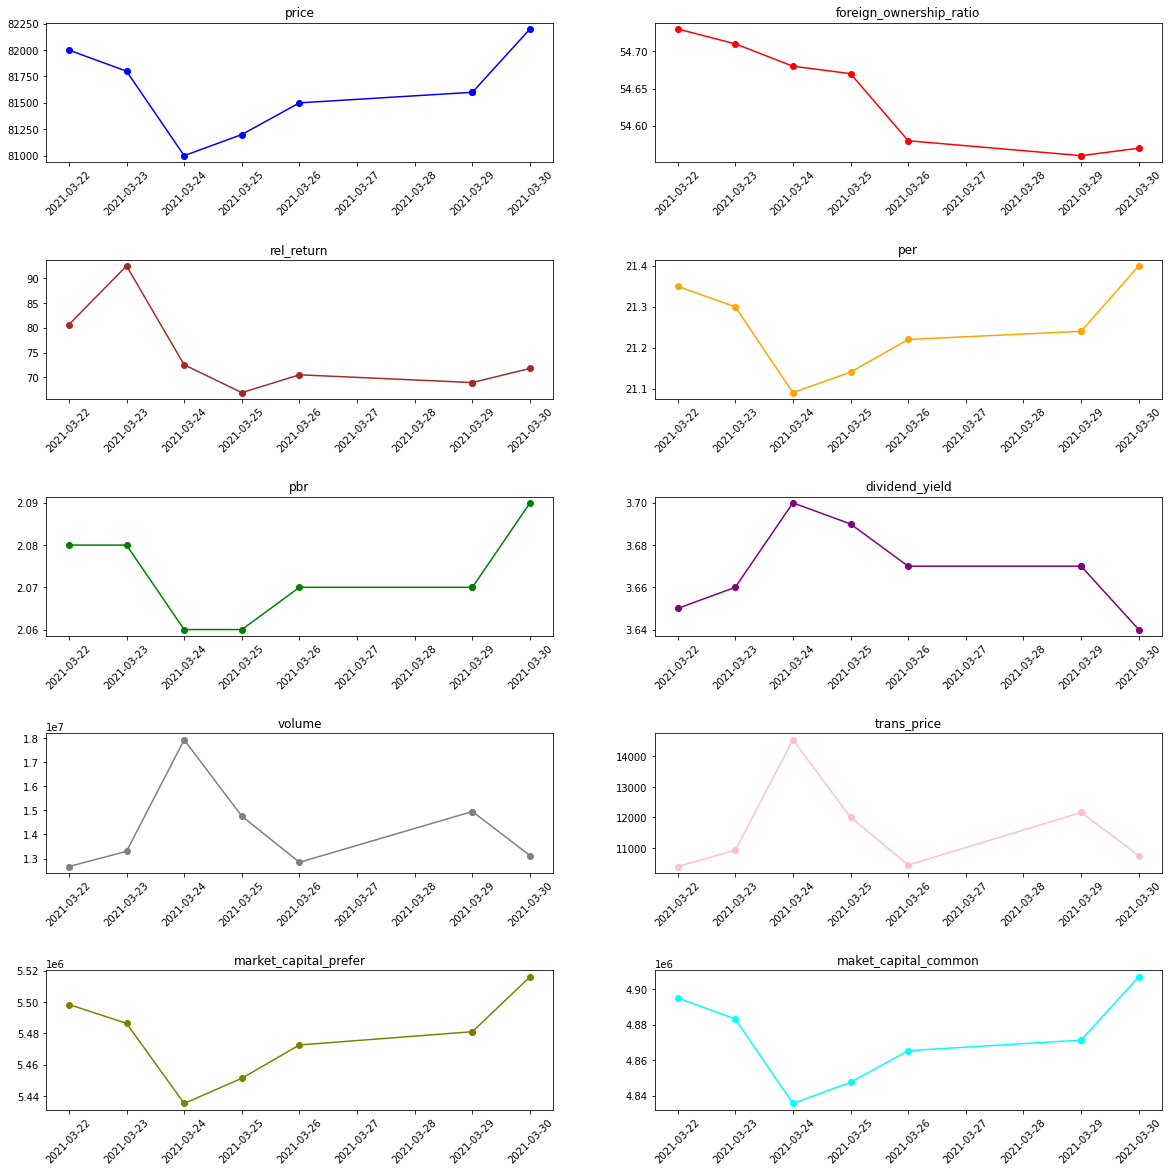

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1) 
plt.plot(df_sam['dt'], df_sam['price'], color='blue', marker='o', linestyle='-')
plt.title('price')
plt.xticks(rotation=45)

plt.subplot(5, 2, 2) 
plt.plot(df_sam['dt'], df_sam['foreign_ownership_ratio'], color='red', marker='o', linestyle='-')
plt.title('foreign_ownership_ratio')
plt.xticks(rotation=45)

plt.subplot(5, 2, 3) 
plt.plot(df_sam['dt'], df_sam['rel_return'], color='brown', marker='o', linestyle='-')
plt.title('rel_return')
plt.xticks(rotation=45)

plt.subplot(5, 2, 4) 
plt.plot(df_sam['dt'], df_sam['per'], color='orange', marker='o', linestyle='-')
plt.title('per')
plt.xticks(rotation=45)

plt.subplot(5, 2, 5) 
plt.plot(df_sam['dt'], df_sam['pbr'], color='green', marker='o', linestyle='-')
plt.title('pbr')
plt.xticks(rotation=45)

plt.subplot(5, 2, 6) 
plt.plot(df_sam['dt'], df_sam['dividend_yield'], color='purple', marker='o', linestyle='-')
plt.title('dividend_yield')
plt.xticks(rotation=45)

plt.subplot(5, 2, 7) 
plt.plot(df_sam['dt'], df_sam['volume'], color='gray', marker='o', linestyle='-')
plt.title('volume')
plt.xticks(rotation=45)

plt.subplot(5, 2, 8) 
plt.plot(df_sam['dt'], df_sam['trans_price'], color='pink', marker='o', linestyle='-')
plt.title('trans_price')
plt.xticks(rotation=45)

plt.subplot(5, 2, 9) 
plt.plot(df_sam['dt'], df_sam['market_capital_prefer'], color='olive', marker='o', linestyle='-')
plt.title('market_capital_prefer')
plt.xticks(rotation=45)

plt.subplot(5, 2, 10) 
plt.plot(df_sam['dt'], df_sam['maket_capital_common'], color='cyan', marker='o', linestyle='-')
plt.title('maket_capital_common')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.7)
plt.show()
